# Video: Implementing Policy Iteration

Policy iteration methods are a common method to solve modest-sized Markov decision problems.
They build on the ideas of value iteration methods, but directly calculate a policy so the policy does not need to be reconstructed later.
This video will walk through implementing policy iteration and a faster variation.

Script: (faculty on screen)
* Policy iteration methods are a common method to solve modest-sized Markov decision problems.
* In this video, I will show you how to implement policy iteration and common speedups to the base algorithm.

## Problem Setup

Problem size:
* $k$ actions
* $n$ states

Problem dynamics:
* $R: k \times n$ array of expected rewards for each action+state
* $P: k \times n \times n$ array of transition probabilities for each action/current state/next state.
* $\gamma$ discount factor for future rewards

Script:
* Policy iteration considers the same problems as value iteration.
* What is the optimal behavior for a Markov decision problem?
* Policy iteration focuses on computing an optimal policy where value iteration focused on optimal values.
* You will see that policy iteration also computes optimal values along the way.

## Policy Iteration Algorithm

1. Pick arbitrary initial policy $\pi_0$.
2. Set $\mathbf{v}_0 = \mathbf{v}_{\pi_0}$ using iterative policy evaluation.
3. For $i = 0, 1, 2, \ldots$ until policy stops changing:
\begin{array}{rcl}
\pi_{i+1}(s) & = & \mathrm{argmax}_{a \in A(s)} \mathcal{R}^a + \gamma \mathcal{P}^a v_i \\
\mathbf{v}_{i+1}(s) & = & \mathbf{v}_{\pi_{i+1}}~\text{using value iteration}
\end{array}


Script:
* Here is the basic form of policy iteration.
* First, you start with an arbitrary first policy, $\pi_0$.
* This first policy can be anything.
* It could pick actions uniformly at random, or just pick the first action.
* The main loop of policy iteration will deterministic policies, so it will be more convenient to start with a deterministic policy too.
* After picking the first policy, use iterative policy evaluation to compute the values under that policy.
* Then the main loop alternates between improving the policy given those values, and improving the values given the new policy.
* Like with value iteration, policy iteration runs until the changes stop or become small.
* Let's look at some code now.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# copied from Implementing Value Iteration video
def compute_qT_once(R, P, gamma, v):
    return R + gamma * P @ v

In [ ]:
# copied from Implementing Value Iteration video
def iterate_values_once(R, P, gamma, v):
    return np.max(compute_qT_once(R, P, gamma, v), axis=0)

In [ ]:
# copied from Implementing Value Iteration video
def value_iteration(R, P, gamma, max_iterations=100, tolerance=0.001):
    # initial approximation v_0
    v_old = np.zeros(R.shape[-1])

    for i in range(max_iterations):
        # compute v_{i+1}
        v_new = iterate_values_once(R, P, gamma, v_old)

        # check if values did not change much
        if np.max(np.abs(v_new - v_old)) < tolerance:
            return v_new

        v_old = v_new

    # return v_{max_iterations}
    return v_old

In [ ]:
# copied from Implementing Iterative Policy Evaluation Video
def iterative_policy_evaluation(R, P, gamma, pi, max_iterations=100, tolerance=0.001):
    # factor out action choices using policy.

    # deterministic version
    n = R.shape[-1]
    R_pi = R[pi, np.arange(n)]
    P_pi = P[pi, np.arange(n),:]

    # reshape to one dummy action to reuse previous example code
    R_pi = R_pi.reshape(1, *R_pi.shape)
    P_pi = P_pi.reshape(1, *P_pi.shape)

    # initial approximation v_0
    v_old = np.zeros(R.shape[-1])

    for i in range(max_iterations):
        # compute v_{i+1}
        v_new = iterate_values_once(R_pi, P_pi, gamma, v_old)

        # check if values did not change much
        if np.max(np.abs(v_new - v_old)) < tolerance:
            return v_new

        v_old = v_new

    # return v_{max_iterations}
    return v_old

Script:
* I copied some of the code from the previous videos on value iteration and iterative policy evaluation.
* We will be using it with some modifications for policy iteration.

In [ ]:
def policy_iteration_baseline(R, P, gamma, max_iterations=100, tolerance=0.001):
    pi_old = np.zeros(R.shape[-1], dtype="int64")
    v_old = iterative_policy_evaluation(R, P, gamma, pi_old)

    for i in range(max_iterations):
        # compute new policy
        pi_new = np.argmax(compute_qT_once(R, P, gamma, v_old), axis=0)
        if np.array_equal(pi_new, pi_old):
            return pi_new, v_old

        # compute new values
        v_new = iterative_policy_evaluation(R, P, gamma, pi_new)
        if np.max(np.abs(v_new - v_old)) < tolerance:
            return pi_new, v_new

        pi_old = pi_new
        v_old = v_new

    return pi_old, v_old

Script:
* I copied and modified the value iteration code for the first version of policy iteration.
* The big changes are that the values are always computed from the latest policy.
* The policy updates are pretty similar to the old value updates; they just change the max to an argmax.
* Let's test it out on our example environment.

## Example Environment

<table>
<tr><td align="right">0🧊</td><td align="right">1🧊</td><td align="right">2🧊</td><td align="right">3🧊</td><td align="right">4🧊</td><td align="right">5🧊</td><td align="right">6🧊</td></tr>
<tr><td align="right">7🧊</td><td align="right">8🧊</td><td align="right">9🧊</td><td align="right">10🧊</td><td align="right">11🧊</td><td align="right">12🧊</td><td align="right">13🧊</td></tr>
<tr><td align="right">14🧊</td><td align="right">15🧊</td><td align="right">16🧊</td><td align="right">17🧊</td><td align="right">18🧊</td><td align="right">19🧊</td><td align="right">20🧊</td></tr>
<tr><td align="right">21🧊</td><td align="right">22🧊</td><td align="right">23🧊</td><td align="right">24🧊</td><td align="right">25🧊</td><td align="right">26🧊</td><td align="right">27🧊</td></tr>
<tr><td align="right">28🧊</td><td align="right">29🧊</td><td align="right">30🧊</td><td align="right">31🧊</td><td align="right">32🧊</td><td align="right">33🧊</td><td align="right">34🧊</td></tr>
<tr><td align="right">35🧊</td><td align="right">36🧊</td><td align="right">37🧊</td><td align="right">38🧊</td><td align="right">39🧊</td><td align="right">40🧊</td><td align="right">41🧊</td></tr>
<tr><td align="right">42🧊</td><td align="right">43🧊</td><td align="right">44🧊</td><td>45🧊</td><td align="right">46🧊</td><td align="right">47🧊</td><td align="right">48🐟</td></tr>
<tr><td></td></tr>
<tr><td align="right">49☑️</td></tr>
</table>

Script:
* Here is our beloved hungry penguin environment.

In [ ]:
actions = ["⬆️", "⬇️", "⬅️", "➡️"]

In [ ]:
P = np.zeros(shape=(len(actions), 50, 50))
for s in range(48):
    # row major order with (0,0) as top left
    x = s % 7
    y = s // 7

    # up action
    if y > 0:
        P[0, s, s-7] = 1
    else:
        P[0, s, s] = 1

    # down action
    if y < 6:
        P[1, s, s+7] = 1
    else:
        P[1, s, s] = 1

    # left action
    if x > 0:
        P[2, s, s-1] = 1
    else:
        P[2, s, s] = 1

    # right action
    if x < 6:
        P[3, s, s+1] = 1
    else:
        P[3, s, s] = 1

# fish state goes to terminal state
P[:,48,49] = 1

# stay in terminal state
P[:,49,49] = 1

In [ ]:
R = np.zeros(shape=(4,50))
R[:,48] = 1

In [ ]:
gamma = 0.9

Script:
* I setup the rewards and transitions the same as when we were looking at value iteration.
* Let's test out the policy iteration now.

In [ ]:
(pi_star, v_star) = policy_iteration_baseline(R, P, gamma)
pi_star

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3,
       3, 3, 3, 3, 0, 0])

Script:
* Policy iteration can return both a policy and values to match since it computes both of them.
* This policy is different from our previous example.
* Let's visualize it.

In [ ]:
np.asarray([actions[a] for a in pi_star[:49]]).reshape(7, 7)

array([['⬇️', '⬇️', '⬇️', '⬇️', '⬇️', '⬇️', '⬇️'],
       ['⬇️', '⬇️', '⬇️', '⬇️', '⬇️', '⬇️', '⬇️'],
       ['⬇️', '⬇️', '⬇️', '⬇️', '⬇️', '⬇️', '⬇️'],
       ['⬇️', '⬇️', '⬇️', '⬇️', '⬇️', '⬇️', '⬇️'],
       ['⬇️', '⬇️', '⬇️', '⬇️', '⬇️', '⬇️', '⬇️'],
       ['⬇️', '⬇️', '⬇️', '⬇️', '⬇️', '⬇️', '⬇️'],
       ['➡️', '➡️', '➡️', '➡️', '➡️', '➡️', '⬆️']], dtype='<U2')

Script:
* This policy is optimal.
* It goes down first instead of right first, but that does not change the optimality for this problem.
* There is an up action at the fish location, but don't worry.
* The action does not matter for that state.
* Let's check the values too.

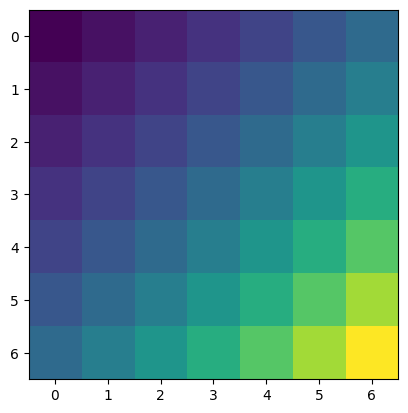

In [ ]:
plt.imshow(v_star[:49].reshape(7, 7));

Script:
* That looks like the same optimal values that we have previously looked at.

## Policy Iteration Algorithm with Warm Start

1. Pick arbitrary initial policy $\pi_0$ (e.g. uniform random actions).
2. Set $\mathbf{v}_0 = \mathbf{v}_{\pi_0}$ using iterative policy evaluation starting from zero values.
3. For $i = 0, 1, 2, \ldots$ until policy stops changing:
\begin{array}{rcl}
\pi_{i+1}(s) & = & \mathrm{argmax}_{a \in A(s)} \mathcal{R}^a + \gamma \mathcal{P}^a \mathbf{v}_i(s) \\
\mathbf{v}_{i+1} & = & \mathbf{v}_{\pi_{i+1}}~\text{using iterative policy evaluation starting from}~\mathbf{v}_i \\
\end{array}


Script:
* The most expensive step of policy iteration is the value updates.
* We can speed them up by starting them from the previous set of values.
* To do so, we will have to update our iterative policy evaluation function.

In [ ]:
# copied from Implementing Iterative Policy Evaluation Video
def iterative_policy_evaluation(R, P, gamma, pi, max_iterations=100, tolerance=0.001, warmstart=None):
    # factor out action choices using policy.

    # deterministic version
    n = R.shape[-1]
    R_pi = R[pi, np.arange(n)]
    P_pi = P[pi, np.arange(n),:]

    # reshape to one dummy action to reuse previous example code
    R_pi = R_pi.reshape(1, *R_pi.shape)
    P_pi = P_pi.reshape(1, *P_pi.shape)

    # initial approximation v_0
    v_old = warmstart if warmstart is not None else np.zeros(R.shape[-1])

    for i in range(max_iterations):
        # compute v_{i+1}
        v_new = iterate_values_once(R_pi, P_pi, gamma, v_old)

        # check if values did not change much
        if np.max(np.abs(v_new - v_old)) < tolerance:
            return v_new

        v_old = v_new

    # return v_{max_iterations}
    return v_old

Script:
* I just added a warmstart parameter, and changed the value initialization to use it if it is present.

In [ ]:
def policy_iteration_warmstart(R, P, gamma, max_iterations=100, tolerance=0.001):
    pi_old = np.zeros(R.shape[-1], dtype="int64")
    v_old = iterative_policy_evaluation(R, P, gamma, pi_old)

    for i in range(max_iterations):
        # compute new policy
        pi_new = np.argmax(compute_qT_once(R, P, gamma, v_old), axis=0)
        if np.array_equal(pi_new, pi_old):
            return pi_new, v_old

        # compute new values
        v_new = iterative_policy_evaluation(R, P, gamma, pi_new, warmstart=v_old)
        if np.max(np.abs(v_new - v_old)) < tolerance:
            return pi_new, v_new

        pi_old = pi_new
        v_old = v_new

    return pi_old, v_old

Script:
* The new policy iteration version just adds that warmstart parameter when calling it in the main loop.

In [ ]:
(pi_warmstart, v_warmstart) = policy_iteration_warmstart(R, P, gamma)
pi_warmstart

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3,
       3, 3, 3, 3, 0, 0])

Script:
* We get the same policy out now, but it's slightly faster.

Script: (faculty on camera)
* Policy iteration is a useful method for computing optimal policies and values.
* There are many variations of policy iteration.
* The warmstart version that we just covered will always be an improvement over the baseline.
* Other variations may be useful more situationally.